 
#  Is it possible to predict popular perfumes?


# Settings:

In [6]:
import bs4
from splinter import Browser
from bs4 import BeautifulSoup
import time
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pandas as pd
import re
import selenium
from pandas import DataFrame
import json
from selenium import webdriver
import scipy as sc
import numpy as np
import time
import os
import requests

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.remote.webelement import WebElement


# Collect 6000 links of perfumes

In [419]:
driver = webdriver.Chrome()

links_list=list()
for i in range(1,100):
    
    driver.get('https://www.fragrancex.com/shopping/best?instock=false&currentPage=' + str(i) + '&searchSortExpression=0')
    driver.implicitly_wait(10)
    more_items_elements = driver.find_elements(By.CLASS_NAME,'search-result-grid')

    for more_items_element in more_items_elements:
        link_elements = more_items_element.find_elements(By.CSS_SELECTOR, 'a.link-2')
        for link_element in link_elements:
            links_list.append(link_element.get_attribute('href'))

len(links_list)



5940

In [479]:
print(len(links_list))
driver.close()

5940


# CREATING ALL LIST'S:

In [481]:
####### CREATING ALL LIST'S #######
brand_name_LIST=[]
fragrance_family_LIST=[]
fragrance_name_LIST=[]
fragrance_classification_LIST=[]
volume_LIST=[]
top_notes_LIST=[]
heart_notes_LIST=[]
base_notes_LIST=[]
gender_LIST=[]
ingredients_LIST=[]
product_form_LIST=[]
year_of_launch_LIST = []
strength_LIST = []
sustainable_LIST = []
country_of_origin_LIST = []

reviews_LIST = []
grade_LIST = []

grade_5_stars_LIST = []
grade_4_stars_LIST = []
grade_3_stars_LIST = []
grade_2_stars_LIST = []
grade_1_stars_LIST = []

recommend_to_friend_LIST=[]



# Crawling:

In [484]:
from selenium.common.exceptions import NoSuchElementException
sum_perfume_succeeded=0
driver2 = webdriver.Chrome()

for i in links_list:
    
    driver2.get(i)
    driver2.implicitly_wait(30)
    time.sleep(2)
        
    # Find all tr elements on the page
    table = driver2.find_element(By.TAG_NAME,'tbody')
    elements = table.find_elements(By.TAG_NAME,'tr')
    
    # Create empty lists to store the text from each td element
    name_elements = []
    text_elements = []

    # Iterate through the tr elements and extract the text from each td element
    for element in elements:
        tds = element.find_elements(By.TAG_NAME, 'td')
        name_elements.append(tds[0].text)
        text_elements.append(tds[1].text)
    
    #This code will check if the string "...." is in the name_elements list and if yes insert to ""...."_name_LIST else NAN
    try:
        index = name_elements.index("Brand")
        brand_name_LIST.append(text_elements[index])
    except ValueError:
        brand_name_LIST.append(None)
        
    try:
        index = name_elements.index("Fragrance Family")
        fragrance_family_LIST.append(text_elements[index])
    except ValueError:
        fragrance_family_LIST.append(None)
        
    
    try:
        index = name_elements.index("Fragrance Name")
        fragrance_name_LIST.append(text_elements[index])
    except ValueError:
        fragrance_name_LIST.append(None)

    try:
        index = name_elements.index("Fragrance Classification")
        fragrance_classification_LIST.append(text_elements[index])
    except ValueError:
        fragrance_classification_LIST.append(None)
       
    try:
        index = name_elements.index("Volume")
        volume_LIST.append(text_elements[index])
    except ValueError:
        volume_LIST.append(None)

    
    try:
        index = name_elements.index("Top Notes")
        top_notes_LIST.append(text_elements[index])
    except ValueError:
        top_notes_LIST.append(None)
    
    
    try:
        index = name_elements.index("Heart Notes")
        heart_notes_LIST.append(text_elements[index])
    except ValueError:
        heart_notes_LIST.append(None)

        
    try:
        index = name_elements.index("Base Notes")
        base_notes_LIST.append(text_elements[index])
    except ValueError:
        base_notes_LIST.append(None)
        
        
    try:
        index = name_elements.index("Gender")
        gender_LIST.append(text_elements[index])
    except ValueError:
        gender_LIST.append(None)
    

    try:
        index = name_elements.index("Product Form")
        product_form_LIST.append(text_elements[index])
    except ValueError:
        product_form_LIST.append(None)

        
    try:
        index = name_elements.index("Year Of Launch")
        year_of_launch_LIST.append(text_elements[index])
    except ValueError:
        year_of_launch_LIST.append(None)

        
    try:
        index = name_elements.index("Strength")
        strength_LIST.append(text_elements[index])
    except ValueError:
        strength_LIST.append(None)
 
    try:
        index = name_elements.index("Sustainable")
        sustainable_LIST.append(text_elements[index])
    except ValueError:
        sustainable_LIST.append(None)

          
    try:
        index = name_elements.index("Country of Origin")
        country_of_origin_LIST.append(text_elements[index])
    except ValueError:
        country_of_origin_LIST.append(None)
        
        
    try:
        index = name_elements.index("Ingredients")
        ingredients_LIST.append(text_elements[index])
    except ValueError:
        ingredients_LIST.append(None)
       
    
    button = driver2.find_element(By.CSS_SELECTOR, "a.btn-type-2.write-review")
    if (button.text=="Write a Review"):
            
        rating_element = driver2.find_element(By.CSS_SELECTOR, 'div[itemprop="ratingValue"][class="h2 serif header-large"]')
        grade_LIST.append(rating_element.text)
            
        review_count_element = driver2.find_element(By.CSS_SELECTOR, 'div[itemprop="reviewCount"][class="review-count"]')
        review_count = review_count_element.get_attribute('content')
        reviews_LIST.append(review_count)
           
    else:
        grade_LIST.append(None)
        reviews_LIST.append(None)

    sum_perfume_succeeded = sum_perfume_succeeded+1
    print(sum_perfume_succeeded)
    #if(sum_perfume_succeeded==100):
    #    driver2.quit()
driver2.quit()
print(sum_perfume_succeeded)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
print(len(strength_LIST))
print(len(brand_name_LIST))
print(len(grade_LIST))
print(len(reviews_LIST))
print(len(recommend_to_friend_LIST))

# Crawling for recommend_to_friend_LIST :

In [842]:
driver2 = webdriver.Chrome()

k=1

for i in links_list:
    print(k)
    k=k+1
    if(k>=3242):
        
        driver2.get(i)
        driver2.implicitly_wait(30)
        time.sleep(1)
        try:
            button = driver2.find_element(By.CSS_SELECTOR, "a.btn-type-2.write-review")
    
            if (button.text=="Write a Review"):
        
                recommend_to_friend = driver2.find_elements(By.CSS_SELECTOR, 'div[class="h2 serif header-large"]')
                recommend_to_friend_LIST.append(recommend_to_friend[1].text)
           
            else:
                recommend_to_friend_LIST.append(None) 
        except:
            recommend_to_friend_LIST.append(None)
driver2.quit()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


# Create a DataFrame:

In [848]:
df = pd.DataFrame({'Brand':brand_name_LIST,'fragrance_name':fragrance_name_LIST,'gender':gender_LIST,'reviews':reviews_LIST,'grade':grade_LIST,'recommend_to_friend':recommend_to_friend_LIST,'fragrance_family':fragrance_family_LIST,
                   'fragrance_classification':fragrance_classification_LIST,'volume':volume_LIST,'top_notes':top_notes_LIST,
                  'heart_notes':heart_notes_LIST,'base_notes':base_notes_LIST,
                  'product_form':product_form_LIST,'year_of_launch':year_of_launch_LIST,'strength':strength_LIST,
                  'sustainable':sustainable_LIST,'country_of_origin':country_of_origin_LIST,'ingredients':ingredients_LIST})
df

,Brand,fragrance_name,gender,reviews,grade,recommend_to_friend,fragrance_family,fragrance_classification,volume,top_notes,heart_notes,base_notes,product_form,year_of_launch,strength,sustainable,country_of_origin,ingredients
0,Dolce & Gabbana,Light Blue,Women,1778,4.7,94%,Citrus,Eau De Toilette (EDT),"Available in 24ml, 50ml, 100ml & 200ml","Sicilian Lemon, Apple, Cedar, Bellflower","Bamboo, Jasmine, White Rose","Cedar, Musk, Amber",Liquid,2001,Strong,Regular,None,"Alcohol, Fragrance, Water, Limonene, Ethylhexy..."
1,Versace,Bright Crystal,Women,1083,4.7,95%,"Floral, Fruity and Musk",Eau De Toilette (EDT),"Available in 30ml, 50ml, 90ml and 200ml","Yuzu, Pomegranate, Water Notes","Peony, Lotus, Magnolia","Musk, Mahogany, Amber",Liquid,2006,Medium,None,Italy,"Alcohol, Denat. (Sd Alcohol 39-C), Fragrance, ..."
2,Versace,Eros,Men,891,4.7,96%,"Woody, Oriental and Fresh notes",Eau De Toilette (EDT),"Available in 5ml, 30ml, 50ml, 100ml & 200ml","Mint, Candy Apple, Lemon, Mandarin Orange","Ambroxan, Geranium, Clary sage","Vanilla, Cedar, Sandalwood, Leather, Bitter Or...",Liquid,2020,Medium,Regular,Italy,"Alcohol Denat. (Sd Alcohol 39-C), Parfum (Frag..."
3,Calvin Klein,Eternity,Women,1164,4.7,96%,Floral,Eau De Parfum (EDP),"Available in 30ml, 50ml & 100ml","Green Notes, Freesia, Sage, Citruses, Mandarin...","Carnation, Lily, Lily of the valley, Narcissus...","Heliotrope, Musk, Sandalwood, Amber, Patchouli",Liquid,1988,Strong,Regular,Spain,None
4,Davidoff,Cool Water,Men,1519,4.6,95%,Aromatic,Eau De Toilette (EDT),"Available in 40ml, 75ml, 125ml & 200ml","Sea Water, Lavender, Mint, Green Notes, Rosema...","Sandalwood, Neroli, Geranium, Jasmine","Musk, Tobacco, Oakmoss, Cedar, Amber",Liquid,1988,Medium,Regular,France,"Alcohol Denat., Aqua/Water/Eau, Parfum/Fragran..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,Sospiro,Wardasina Rosso Afgano,Women,None,None,None,Patchouli,Perfume,Available in 100 ml,None,None,None,None,2012,None,None,None,None
5936,Miller Harris,Wander Through The Parks,Women,None,None,None,Patchouli,Perfume,Available in 50 ml and 100 ml,None,None,None,None,2018,None,None,None,None
5937,Kate Spade,Walk On Air Sunset,Women,None,None,None,Bergamot,"Perfume, Mini","Available in 5 ml, 8 ml and 100 ml",None,None,None,None,2016,None,None,None,None
5938,Vurv,Vurv Velocity,Men,None,None,None,None,None,Available in 100 ml,None,None,None,None,None,None,None,None,None


# create copy of df

In [850]:
data_fram_2 = df.copy()
data_fram_2

,Brand,fragrance_name,gender,reviews,grade,recommend_to_friend,fragrance_family,fragrance_classification,volume,top_notes,heart_notes,base_notes,product_form,year_of_launch,strength,sustainable,country_of_origin,ingredients
0,Dolce & Gabbana,Light Blue,Women,1778,4.7,94%,Citrus,Eau De Toilette (EDT),"Available in 24ml, 50ml, 100ml & 200ml","Sicilian Lemon, Apple, Cedar, Bellflower","Bamboo, Jasmine, White Rose","Cedar, Musk, Amber",Liquid,2001,Strong,Regular,None,"Alcohol, Fragrance, Water, Limonene, Ethylhexy..."
1,Versace,Bright Crystal,Women,1083,4.7,95%,"Floral, Fruity and Musk",Eau De Toilette (EDT),"Available in 30ml, 50ml, 90ml and 200ml","Yuzu, Pomegranate, Water Notes","Peony, Lotus, Magnolia","Musk, Mahogany, Amber",Liquid,2006,Medium,None,Italy,"Alcohol, Denat. (Sd Alcohol 39-C), Fragrance, ..."
2,Versace,Eros,Men,891,4.7,96%,"Woody, Oriental and Fresh notes",Eau De Toilette (EDT),"Available in 5ml, 30ml, 50ml, 100ml & 200ml","Mint, Candy Apple, Lemon, Mandarin Orange","Ambroxan, Geranium, Clary sage","Vanilla, Cedar, Sandalwood, Leather, Bitter Or...",Liquid,2020,Medium,Regular,Italy,"Alcohol Denat. (Sd Alcohol 39-C), Parfum (Frag..."
3,Calvin Klein,Eternity,Women,1164,4.7,96%,Floral,Eau De Parfum (EDP),"Available in 30ml, 50ml & 100ml","Green Notes, Freesia, Sage, Citruses, Mandarin...","Carnation, Lily, Lily of the valley, Narcissus...","Heliotrope, Musk, Sandalwood, Amber, Patchouli",Liquid,1988,Strong,Regular,Spain,None
4,Davidoff,Cool Water,Men,1519,4.6,95%,Aromatic,Eau De Toilette (EDT),"Available in 40ml, 75ml, 125ml & 200ml","Sea Water, Lavender, Mint, Green Notes, Rosema...","Sandalwood, Neroli, Geranium, Jasmine","Musk, Tobacco, Oakmoss, Cedar, Amber",Liquid,1988,Medium,Regular,France,"Alcohol Denat., Aqua/Water/Eau, Parfum/Fragran..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,Sospiro,Wardasina Rosso Afgano,Women,None,None,None,Patchouli,Perfume,Available in 100 ml,None,None,None,None,2012,None,None,None,None
5936,Miller Harris,Wander Through The Parks,Women,None,None,None,Patchouli,Perfume,Available in 50 ml and 100 ml,None,None,None,None,2018,None,None,None,None
5937,Kate Spade,Walk On Air Sunset,Women,None,None,None,Bergamot,"Perfume, Mini","Available in 5 ml, 8 ml and 100 ml",None,None,None,None,2016,None,None,None,None
5938,Vurv,Vurv Velocity,Men,None,None,None,None,None,Available in 100 ml,None,None,None,None,None,None,None,None,None


# Create a CSV file & read to df_read

In [ ]:
#data_fram_2.to_csv('perfiumes_data.csv',index=False)

In [194]:
df_read=pd.read_csv('perfiumes_data.csv')

In [195]:
df_read

,Brand,fragrance_name,gender,reviews,grade,recommend_to_friend,fragrance_family,fragrance_classification,volume,top_notes,heart_notes,base_notes,product_form,year_of_launch,strength,sustainable,country_of_origin,ingredients
0,Dolce & Gabbana,Light Blue,Women,1778.0,4.7,94%,Citrus,Eau De Toilette (EDT),"Available in 24ml, 50ml, 100ml & 200ml","Sicilian Lemon, Apple, Cedar, Bellflower","Bamboo, Jasmine, White Rose","Cedar, Musk, Amber",Liquid,2001.0,Strong,Regular,NaN,"Alcohol, Fragrance, Water, Limonene, Ethylhexy..."
1,Versace,Bright Crystal,Women,1083.0,4.7,95%,"Floral, Fruity and Musk",Eau De Toilette (EDT),"Available in 30ml, 50ml, 90ml and 200ml","Yuzu, Pomegranate, Water Notes","Peony, Lotus, Magnolia","Musk, Mahogany, Amber",Liquid,2006.0,Medium,NaN,Italy,"Alcohol, Denat. (Sd Alcohol 39-C), Fragrance, ..."
2,Versace,Eros,Men,891.0,4.7,96%,"Woody, Oriental and Fresh notes",Eau De Toilette (EDT),"Available in 5ml, 30ml, 50ml, 100ml & 200ml","Mint, Candy Apple, Lemon, Mandarin Orange","Ambroxan, Geranium, Clary sage","Vanilla, Cedar, Sandalwood, Leather, Bitter Or...",Liquid,2020.0,Medium,Regular,Italy,"Alcohol Denat. (Sd Alcohol 39-C), Parfum (Frag..."
3,Calvin Klein,Eternity,Women,1164.0,4.7,96%,Floral,Eau De Parfum (EDP),"Available in 30ml, 50ml & 100ml","Green Notes, Freesia, Sage, Citruses, Mandarin...","Carnation, Lily, Lily of the valley, Narcissus...","Heliotrope, Musk, Sandalwood, Amber, Patchouli",Liquid,1988.0,Strong,Regular,Spain,NaN
4,Davidoff,Cool Water,Men,1519.0,4.6,95%,Aromatic,Eau De Toilette (EDT),"Available in 40ml, 75ml, 125ml & 200ml","Sea Water, Lavender, Mint, Green Notes, Rosema...","Sandalwood, Neroli, Geranium, Jasmine","Musk, Tobacco, Oakmoss, Cedar, Amber",Liquid,1988.0,Medium,Regular,France,"Alcohol Denat., Aqua/Water/Eau, Parfum/Fragran..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,Sospiro,Wardasina Rosso Afgano,Women,NaN,NaN,NaN,Patchouli,Perfume,Available in 100 ml,NaN,NaN,NaN,NaN,2012.0,NaN,NaN,NaN,NaN
5936,Miller Harris,Wander Through The Parks,Women,NaN,NaN,NaN,Patchouli,Perfume,Available in 50 ml and 100 ml,NaN,NaN,NaN,NaN,2018.0,NaN,NaN,NaN,NaN
5937,Kate Spade,Walk On Air Sunset,Women,NaN,NaN,NaN,Bergamot,"Perfume, Mini","Available in 5 ml, 8 ml and 100 ml",NaN,NaN,NaN,NaN,2016.0,NaN,NaN,NaN,NaN
5938,Vurv,Vurv Velocity,Men,NaN,NaN,NaN,NaN,NaN,Available in 100 ml,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# normalization 

In [196]:
df_final = df_read.copy()
  
#normalization 
column = 'grade'
df_final[column] = (df_final[column] - df_final[column].min()) / (df_final[column].max() - df_final[column].min())    
  
# view normalized data
#display(df_normalized)
df_final['grade']

0       0.925
1       0.925
2       0.925
3       0.925
4       0.900
        ...  
5935      NaN
5936      NaN
5937      NaN
5938      NaN
5939      NaN
Name: grade, Length: 5940, dtype: float64

In [197]:
df_final['grade'].rank()

0       2955.5
1       2955.5
2       2955.5
3       2955.5
4       2461.0
         ...  
5935       NaN
5936       NaN
5937       NaN
5938       NaN
5939       NaN
Name: grade, Length: 5940, dtype: float64

# remove the rows that do not have a grade and reviews

In [198]:
# remove the lines that do not have a grade and reviews
df_final=df_final.dropna(subset=['grade'])

#Rearranges the indexes again
df_final.reset_index(inplace=True,drop=True)


In [199]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4533 entries, 0 to 4532
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     4533 non-null   object 
 1   fragrance_name            4533 non-null   object 
 2   gender                    4533 non-null   object 
 3   reviews                   4533 non-null   float64
 4   grade                     4533 non-null   float64
 5   recommend_to_friend       4533 non-null   object 
 6   fragrance_family          3368 non-null   object 
 7   fragrance_classification  4527 non-null   object 
 8   volume                    4526 non-null   object 
 9   top_notes                 1287 non-null   object 
 10  heart_notes               1275 non-null   object 
 11  base_notes                1268 non-null   object 
 12  product_form              10 non-null     object 
 13  year_of_launch            3498 non-null   float64
 14  strength

# Deleting columns that do not have enough data:
According to the info, we see that data is missing in:
* ingredients               
* country_of_origin         
* sustainable               
* strength 
* product_form              

In [200]:
df_final.drop(['ingredients'],axis=1,inplace=True)
df_final.drop(['country_of_origin'],axis=1,inplace=True)
df_final.drop(['sustainable'],axis=1,inplace=True)
df_final.drop(['strength'],axis=1,inplace=True)
df_final.drop(['product_form'],axis=1,inplace=True)
df_final

,Brand,fragrance_name,gender,reviews,grade,recommend_to_friend,fragrance_family,fragrance_classification,volume,top_notes,heart_notes,base_notes,year_of_launch
0,Dolce & Gabbana,Light Blue,Women,1778.0,0.925,94%,Citrus,Eau De Toilette (EDT),"Available in 24ml, 50ml, 100ml & 200ml","Sicilian Lemon, Apple, Cedar, Bellflower","Bamboo, Jasmine, White Rose","Cedar, Musk, Amber",2001.0
1,Versace,Bright Crystal,Women,1083.0,0.925,95%,"Floral, Fruity and Musk",Eau De Toilette (EDT),"Available in 30ml, 50ml, 90ml and 200ml","Yuzu, Pomegranate, Water Notes","Peony, Lotus, Magnolia","Musk, Mahogany, Amber",2006.0
2,Versace,Eros,Men,891.0,0.925,96%,"Woody, Oriental and Fresh notes",Eau De Toilette (EDT),"Available in 5ml, 30ml, 50ml, 100ml & 200ml","Mint, Candy Apple, Lemon, Mandarin Orange","Ambroxan, Geranium, Clary sage","Vanilla, Cedar, Sandalwood, Leather, Bitter Or...",2020.0
3,Calvin Klein,Eternity,Women,1164.0,0.925,96%,Floral,Eau De Parfum (EDP),"Available in 30ml, 50ml & 100ml","Green Notes, Freesia, Sage, Citruses, Mandarin...","Carnation, Lily, Lily of the valley, Narcissus...","Heliotrope, Musk, Sandalwood, Amber, Patchouli",1988.0
4,Davidoff,Cool Water,Men,1519.0,0.900,95%,Aromatic,Eau De Toilette (EDT),"Available in 40ml, 75ml, 125ml & 200ml","Sea Water, Lavender, Mint, Green Notes, Rosema...","Sandalwood, Neroli, Geranium, Jasmine","Musk, Tobacco, Oakmoss, Cedar, Amber",1988.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4528,Cindy C.,Watergate,Men,1.0,1.000,100%,Citrus,Cologne,Available in 100 ml,NaN,NaN,NaN,2003.0
4529,Waterford,Waterford Lismore,Women,12.0,0.875,92%,NaN,Perfume,"Available in 30 ml, 50 ml and 100 ml",NaN,NaN,NaN,NaN
4530,Perfumers Workshop,Watercolors,Women,2.0,1.000,100%,Rose,"Body Lotion, Perfume",Available in 50 ml and 207 ml,NaN,NaN,NaN,1995.0
4531,Bond No. 9,Washington Square,Women,3.0,1.000,50%,fresh,Perfume,Available in 50 ml and 100 ml,"Bergamot, Geranium, Tarragon","Rose (purple), Honey","Leather, Vetiver, Amber, Musk",2010.0


# drop duplicates

In [201]:
df_final.drop_duplicates(inplace=True)

In [202]:
df_final.describe(include='all')   


,Brand,fragrance_name,gender,reviews,grade,recommend_to_friend,fragrance_family,fragrance_classification,volume,top_notes,heart_notes,base_notes,year_of_launch
count,4533,4533,4533,4533.000000,4533.000000,4533,3368,4527,4526,1287,1275,1268,3498.000000
unique,625,4281,3,NaN,NaN,50,28,1051,1494,1243,1247,1114,NaN
top,Demeter,Light Blue,Women,NaN,NaN,100%,Bergamot,Perfume,Available in 100 ml,"Bergamot, Lemon","Jasmine, Rose","Cedarwood, Sandalwood, Musk",NaN
freq,142,2,2541,NaN,NaN,1871,778,1673,1000,8,3,10,NaN
mean,NaN,NaN,NaN,42.431502,0.851086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.965409
std,NaN,NaN,NaN,112.578246,0.165634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,432.064658
min,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.000000
25%,NaN,NaN,NaN,2.000000,0.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000
50%,NaN,NaN,NaN,7.000000,0.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000
75%,NaN,NaN,NaN,29.000000,0.950000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000


In [203]:
df_final["Brand"] = df_final["Brand"].astype("category")
df_final["fragrance_name"] = df_final["fragrance_name"].astype("string")

df_final["gender"] = df_final["gender"].astype("category")
df_final["reviews"] = df_final["reviews"].astype("int")

df_final["recommend_to_friend"] = df_final["recommend_to_friend"].astype("category")
df_final["fragrance_family"] = df_final["fragrance_family"].astype("category")
df_final["fragrance_classification"] = df_final["fragrance_classification"].astype("category")
df_final["volume"] = df_final["volume"].astype("category")
df_final["top_notes"] = df_final["top_notes"].astype("category")
#df_final["year_of_launch"] = df_final["year_of_launch"].astype("category")
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4533 entries, 0 to 4532
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Brand                     4533 non-null   category
 1   fragrance_name            4533 non-null   string  
 2   gender                    4533 non-null   category
 3   reviews                   4533 non-null   int32   
 4   grade                     4533 non-null   float64 
 5   recommend_to_friend       4533 non-null   category
 6   fragrance_family          3368 non-null   category
 7   fragrance_classification  4527 non-null   category
 8   volume                    4526 non-null   category
 9   top_notes                 1287 non-null   category
 10  heart_notes               1275 non-null   object  
 11  base_notes                1268 non-null   object  
 12  year_of_launch            3498 non-null   float64 
dtypes: category(7), float64(2), int32(1), object(2),

# -------------------------------------- EDA - visualizations-------------------------------------------

In [204]:
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns


# find and fix outliers 

Text(0, 0.5, 'frequency')

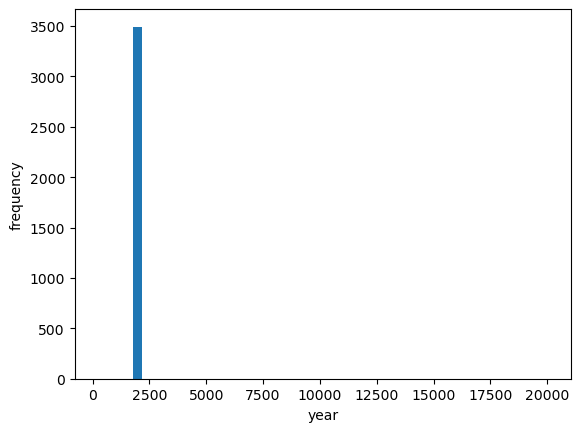

In [205]:
plt.hist(df_final.year_of_launch,bins=50)
plt.xlabel('year')
plt.ylabel('frequency')

In [142]:
# Compute the 25th and 75th percentiles
q25 = df_final["year_of_launch"].quantile(0.25)
q75 = df_final["year_of_launch"].quantile(0.75)

# Calculate the IQR
iqr = q75 - q25

# Identify values that are more than 1.5 times the IQR below the 25th percentile or above the 75th percentile
outliers = df_final[(df_final["year_of_launch"] < q25 - 3*iqr)
                    | (df_final["year_of_launch"] > q75 + 3*iqr)].index

# drop outliers

for i in outliers:
    df_final = df_final.drop(i, axis=0)

Text(0, 0.5, 'frequency')

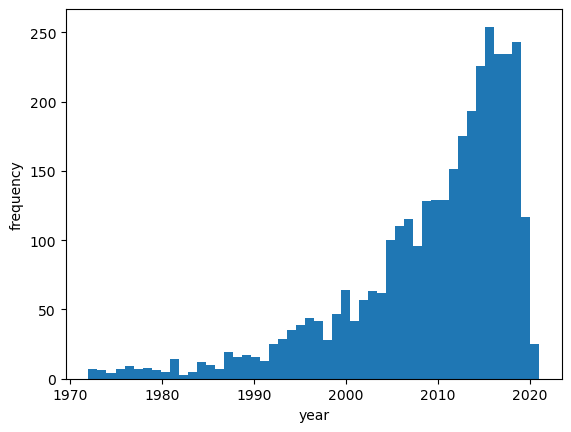

In [143]:
# Same histogram
plt.hist(df_final.year_of_launch,bins=50)
plt.xlabel('year')
plt.ylabel('frequency')

# --------------------------------------------------------- (no more outliers)

# Scatter_plot  (year of launch , grade)

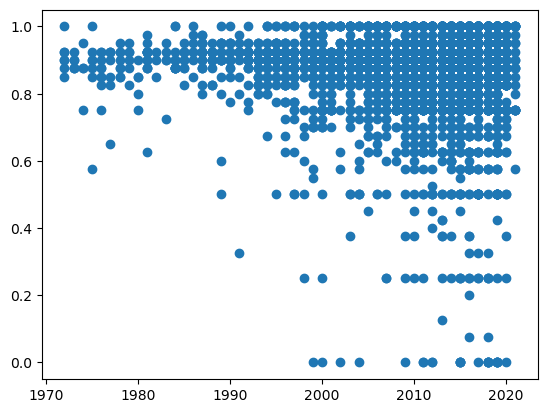

In [144]:
plt.scatter(df_final.year_of_launch,df_final.grade)

# Grades histogram:

Text(0.5, 1.0, 'grades histogram')

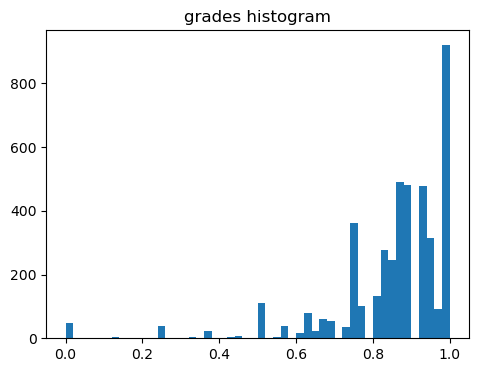

In [145]:
fig=plt.figure(figsize=(12,4))

fig1=fig.add_subplot(1,2,1)
#fig2=fig.add_subplot(1,2,2)

fig1.hist(df_final.grade,bins=50)
fig1.set_title('grades histogram')

#fig2.hist(df_final.Brand,bins=30)
#fig2.set_title('Brand histogram')

# Histogram - Grade by gender ( Men , Women , Men and Women)

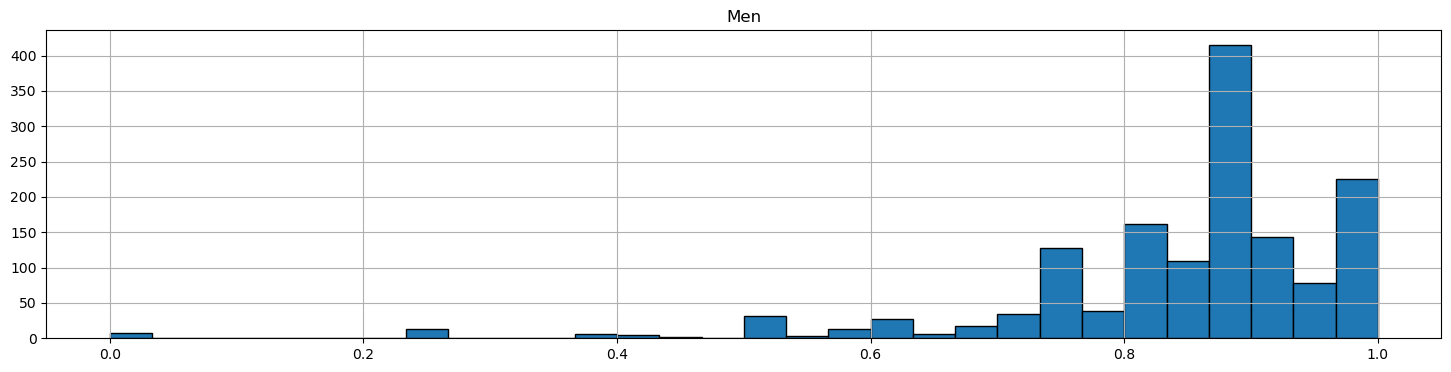

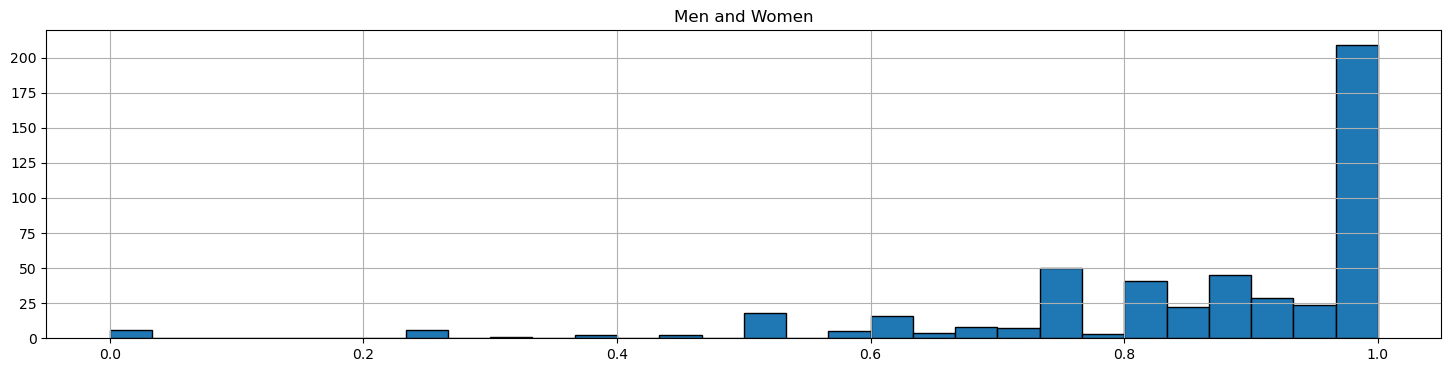

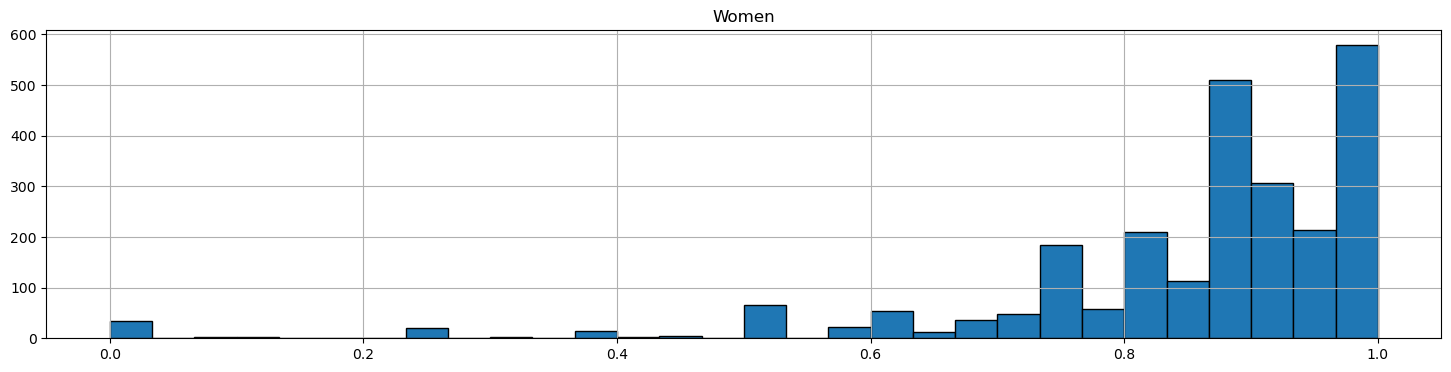

In [146]:
grouped_df = df_final.groupby('gender')
for gen,group in grouped_df:
    group['grade'].hist(bins=30,edgecolor='black',figsize=(18,4))
    plt.title(gen)
    plt.show()

# From this histogram we understand that unisex perfumes will receive a higher grade.

# Barplot: mean grade for all fragrance family

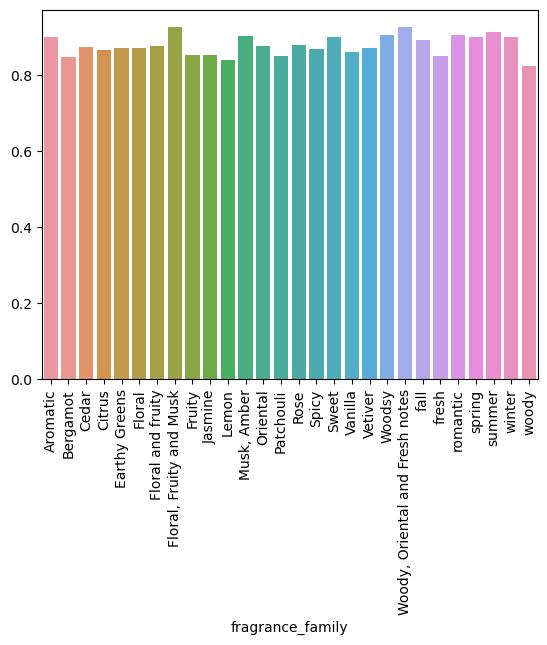

In [206]:
grouped_df = df_final.groupby('fragrance_family')

means = grouped_df["grade"].mean()

sns.barplot(x=means.index,y=means.values)
plt.xticks(rotation=90)

plt.show()

# From this barplot we understand that 
 * floral, fruity and musk
 * woody,oriental and fresh notes 
 
perfumes will receive a higher grade.


# Scatter_plot :
# A grade for each company and the number of its perfumes on the site

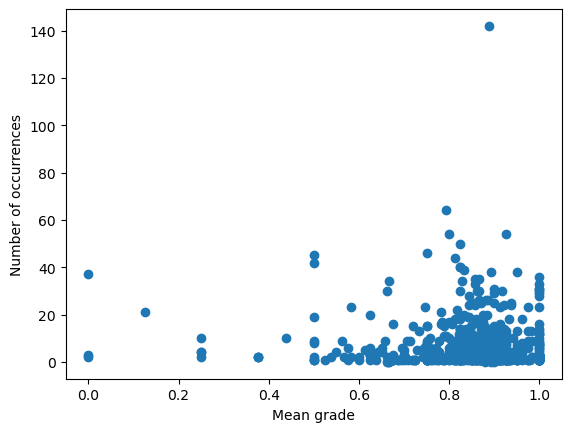

In [148]:
mean_grades = df_final.groupby("Brand")["grade"].mean()
# Count the number of occurrences of each editor
Brand_counts = df_final["Brand"].value_counts()
# Create the scatter plot
plt.scatter(x=mean_grades, y=Brand_counts)
# Set the x-axis label
plt.xlabel("Mean grade")
# Set the y-axis label
plt.ylabel("Number of occurrences")
# Show the plot
plt.show()

# Machine learning

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression

In [150]:
scaler = MinMaxScaler(feature_range=(0,1))
df_final["grade"] = scaler.fit_transform(df_final[["grade"]])

In [151]:
Properties = ['reviews', "Brand", 'gender','recommend_to_friend', 'fragrance_family', 'fragrance_classification', 'volume']
X = df_final[Properties]
y = df_final['grade']
print(X.head())
print(y.head())

   reviews            Brand gender recommend_to_friend  \
0     1778  Dolce & Gabbana  Women                 94%   
1     1083          Versace  Women                 95%   
2      891          Versace    Men                 96%   
3     1164     Calvin Klein  Women                 96%   
4     1519         Davidoff    Men                 95%   

                  fragrance_family fragrance_classification  \
0                           Citrus    Eau De Toilette (EDT)   
1          Floral, Fruity and Musk    Eau De Toilette (EDT)   
2  Woody, Oriental and Fresh notes    Eau De Toilette (EDT)   
3                           Floral      Eau De Parfum (EDP)   
4                         Aromatic    Eau De Toilette (EDT)   

                                        volume  
0       Available in 24ml, 50ml, 100ml & 200ml  
1      Available in 30ml, 50ml, 90ml and 200ml  
2  Available in 5ml, 30ml, 50ml, 100ml & 200ml  
3              Available in 30ml, 50ml & 100ml  
4       Available in 40ml, 

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("X_train:")
print(X_train.head())
print("y_train:")
print(y_train.head())

Initial amount of samples: #4462
Number of training samples: #3569
Number of test samples: #893
X_train:
      reviews                Brand         gender recommend_to_friend  \
1315       13              Bentley            Men                 92%   
2758        1              Demeter          Women                100%   
3605        5                Creed          Women                 25%   
4385        1            Bois 1920  Men and Women                100%   
2655        2  Salvatore Ferragamo          Women                100%   

     fragrance_family fragrance_classification  \
1315            Cedar                  Cologne   
2758              NaN                  Perfume   
3605              NaN                  Perfume   
4385              NaN          Perfume, Sample   
2655            Cedar                  Perfume   

                                    volume  
1315                   Available in 100 ml  
2758          Available in 8 ml and 120 ml  
3605  Available in 3

In [153]:
X_train_numeric = X_train._get_numeric_data().copy()
X_numeric_cols = X_train_numeric.columns
X_test_numeric = X_test[X_numeric_cols].copy()
X_numeric_cols


Index(['reviews'], dtype='object')

In [154]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(
    X_train_numeric), columns=X_numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.fit_transform(
    X_test_numeric), columns=X_numeric_cols, index=X_test.index)
X_train_scaled.head()

,reviews
1315,0.006753
2758,0.000000
3605,0.002251
4385,0.000000
2655,0.000563


In [155]:
X.select_dtypes('category')

,Brand,gender,recommend_to_friend,fragrance_family,fragrance_classification,volume
0,Dolce & Gabbana,Women,94%,Citrus,Eau De Toilette (EDT),"Available in 24ml, 50ml, 100ml & 200ml"
1,Versace,Women,95%,"Floral, Fruity and Musk",Eau De Toilette (EDT),"Available in 30ml, 50ml, 90ml and 200ml"
2,Versace,Men,96%,"Woody, Oriental and Fresh notes",Eau De Toilette (EDT),"Available in 5ml, 30ml, 50ml, 100ml & 200ml"
3,Calvin Klein,Women,96%,Floral,Eau De Parfum (EDP),"Available in 30ml, 50ml & 100ml"
4,Davidoff,Men,95%,Aromatic,Eau De Toilette (EDT),"Available in 40ml, 75ml, 125ml & 200ml"
...,...,...,...,...,...,...
4528,Cindy C.,Men,100%,Citrus,Cologne,Available in 100 ml
4529,Waterford,Women,92%,NaN,Perfume,"Available in 30 ml, 50 ml and 100 ml"
4530,Perfumers Workshop,Women,100%,Rose,"Body Lotion, Perfume",Available in 50 ml and 207 ml
4531,Bond No. 9,Women,50%,fresh,Perfume,Available in 50 ml and 100 ml


In [156]:
X_discrete = X.select_dtypes('category').copy()
X_discrete_encoded = pd.get_dummies(X_discrete, prefix_sep="__")

X_train_discrete_encoded = X_discrete_encoded.loc[X_train.index, :]
X_test_discrete_encoded = X_discrete_encoded.loc[X_test.index, :]
X_train_discrete_encoded.head()


,Brand__100 Bon,Brand__4711,Brand__50 Cent,Brand__A Lab on Fire,Brand__A. Ferretti,Brand__AIR VAL INTERNATIONAL,Brand__Aayan Perfume,Brand__Abercrombie & Fitch,Brand__Acca Kappa,Brand__Acqua Di Parma,...,volume__Available in 90 ml,volume__Available in 90 ml and 100 ml,volume__Available in 90 ml and 150 ml,volume__Available in 90 ml and 240 ml,"volume__Available in 90 ml, 120 ml and 150 ml","volume__Available in 90 ml, 120 ml, 150 ml and 177 ml",volume__Available in 92 ml,volume__Available in 94 ml,volume__Available in 98 ml,volume__Available in 98 ml and 100 ml
1315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
X_train_processed = pd.concat((X_train_scaled, X_train_discrete_encoded), axis=1)
X_test_processed = pd.concat((X_test_scaled, X_test_discrete_encoded), axis=1)
X_train_processed.head()

,reviews,Brand__100 Bon,Brand__4711,Brand__50 Cent,Brand__A Lab on Fire,Brand__A. Ferretti,Brand__AIR VAL INTERNATIONAL,Brand__Aayan Perfume,Brand__Abercrombie & Fitch,Brand__Acca Kappa,...,volume__Available in 90 ml,volume__Available in 90 ml and 100 ml,volume__Available in 90 ml and 150 ml,volume__Available in 90 ml and 240 ml,"volume__Available in 90 ml, 120 ml and 150 ml","volume__Available in 90 ml, 120 ml, 150 ml and 177 ml",volume__Available in 92 ml,volume__Available in 94 ml,volume__Available in 98 ml,volume__Available in 98 ml and 100 ml
1315,0.006753,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2758,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3605,0.002251,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2655,0.000563,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
X_train_processed.columns


Index(['reviews', 'Brand__100 Bon', 'Brand__4711', 'Brand__50 Cent',
       'Brand__A Lab on Fire', 'Brand__A. Ferretti',
       'Brand__AIR VAL INTERNATIONAL', 'Brand__Aayan Perfume',
       'Brand__Abercrombie & Fitch', 'Brand__Acca Kappa',
       ...
       'volume__Available in 90 ml', 'volume__Available in 90 ml and 100 ml',
       'volume__Available in 90 ml and 150 ml',
       'volume__Available in 90 ml and 240 ml',
       'volume__Available in 90 ml, 120 ml and 150 ml',
       'volume__Available in 90 ml, 120 ml, 150 ml and 177 ml',
       'volume__Available in 92 ml', 'volume__Available in 94 ml',
       'volume__Available in 98 ml', 'volume__Available in 98 ml and 100 ml'],
      dtype='object', length=3252)

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# PLOT TWIST

## After noticing over fitting, changing the machine learnning from linear regression to classification

In [160]:
Is_Successful = []
for element in df_final["grade"]:
    if element > 0.8:
        Is_Successful.append(1)
    else:
        Is_Successful.append(0)

In [161]:
df_final["Is_Successful"] = Is_Successful

In [162]:
df_final["Is_Successful"] = df_final["Is_Successful"].astype("category")

# chi2

In [163]:
from scipy.stats import chi2_contingency
ct1 = pd.crosstab(df_final["Brand"], df_final['Is_Successful'])
chi2_contingency(ct1)

(1158.421393266899,
 2.3932876175105714e-35,
 618,
 array([[ 1.04168534,  2.95831466],
        [ 5.46884805, 15.53115195],
        [ 0.26042134,  0.73957866],
        ...,
        [ 1.30210668,  3.69789332],
        [ 1.56252801,  4.43747199],
        [ 1.04168534,  2.95831466]]))

(1.281313162264199,
 0.5269463274190129,
 2,
 array([[ 382.29852084,  129.68982519,  650.01165397],
        [1085.70147916,  368.31017481, 1845.98834603]]))

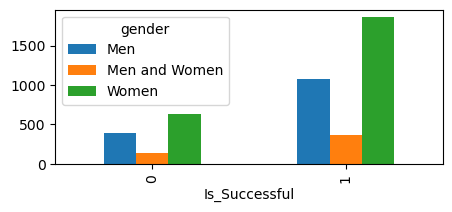

In [164]:
ct1 = pd.crosstab(df_final["Is_Successful"], df_final['gender'])
ct1.plot(kind='bar', figsize=(5, 2))
chi2_contingency(ct1)

In [165]:
ct1 = pd.crosstab(df_final["Is_Successful"], df_final['fragrance_classification'])
chi2_contingency(ct1)

(679.527699920079,
 0.9999999999999999,
 1006,
 array([[1.30273788, 0.26054758, 0.26054758, ..., 0.26054758, 0.26054758,
         0.26054758],
        [3.69726212, 0.73945242, 0.73945242, ..., 0.73945242, 0.73945242,
         0.73945242]]))

In [166]:
ct1 = pd.crosstab(df_final["Is_Successful"], df_final['fragrance_family'])
chi2_contingency(ct1)

(49.7115299045485,
 0.00491267834705262,
 27,
 array([[2.35329704e-01, 1.79321234e+02, 7.74234725e+01, 1.28725348e+02,
         1.17664852e+01, 6.96575923e+01, 2.35329704e-01, 2.35329704e-01,
         4.70659407e+00, 6.16563823e+01, 2.44742892e+01, 6.11857229e+00,
         2.35329704e-01, 3.27108288e+01, 5.03605566e+01, 7.53055051e+00,
         2.35329704e-01, 3.36521476e+01, 8.23653962e+00, 2.82395644e+00,
         2.35329704e-01, 3.29461585e+00, 7.15402299e+01, 9.41318814e-01,
         2.35329704e-01, 9.41318814e-01, 2.35329704e-01, 2.35329704e-01],
        [7.64670296e-01, 5.82678766e+02, 2.51576528e+02, 4.18274652e+02,
         3.82335148e+01, 2.26342408e+02, 7.64670296e-01, 7.64670296e-01,
         1.52934059e+01, 2.00343618e+02, 7.95257108e+01, 1.98814277e+01,
         7.64670296e-01, 1.06289171e+02, 1.63639443e+02, 2.44694495e+01,
         7.64670296e-01, 1.09347852e+02, 2.67634604e+01, 9.17604356e+00,
         7.64670296e-01, 1.07053842e+01, 2.32459770e+02, 3.05868119e+00,
    

In [168]:
bins = [0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250, 2400, 2550, 2700, 2850, 3000,4000]
labels = ['0-150', '150-300', '300-450', '450-600', '600-750', '750-900', '900-1050', '1050-1200', '1200-1350', '1350-1500', '1500-1650', 
          '1650-1800', '1800-1950', '1950-2100', '2100-2250', '2250-2400', '2400-2550', '2550-2700', '2700-2850', '2850-3000', '3000+']
df_final['reviews_discrete'] = pd.cut(df_final['reviews'], bins, labels=labels)

(114.46572471529431,
 2.341642385841039e-19,
 11,
 array([[1.08309234e+03, 3.07590766e+03],
        [4.76571044e+01, 1.35342896e+02],
        [1.48440161e+01, 4.21559839e+01],
        [5.20842671e+00, 1.47915733e+01],
        [4.16674137e+00, 1.18332586e+01],
        [2.86463469e+00, 8.13536531e+00],
        [1.82294935e+00, 5.17705065e+00],
        [1.30210668e+00, 3.69789332e+00],
        [2.60421336e-01, 7.39578664e-01],
        [2.60421336e-01, 7.39578664e-01],
        [2.60421336e-01, 7.39578664e-01],
        [2.60421336e-01, 7.39578664e-01]]))

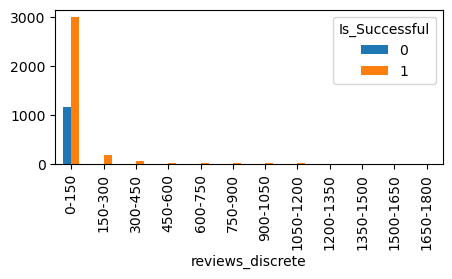

In [169]:
ct1 = pd.crosstab(df_final["reviews_discrete"], df_final['Is_Successful'])
ct1.plot(kind='bar', figsize=(5, 2))
chi2_contingency(ct1)

,Brand,fragrance_name,gender,reviews,grade,recommend_to_friend,fragrance_family,fragrance_classification,volume,top_notes,heart_notes,base_notes,year_of_launch,Is_Successful,reviews_discrete
0,Dolce & Gabbana,Light Blue,Women,1778,0.925,94%,Citrus,Eau De Toilette (EDT),"Available in 24ml, 50ml, 100ml & 200ml","Sicilian Lemon, Apple, Cedar, Bellflower","Bamboo, Jasmine, White Rose","Cedar, Musk, Amber",2001.0,1,1650-1800
1,Versace,Bright Crystal,Women,1083,0.925,95%,"Floral, Fruity and Musk",Eau De Toilette (EDT),"Available in 30ml, 50ml, 90ml and 200ml","Yuzu, Pomegranate, Water Notes","Peony, Lotus, Magnolia","Musk, Mahogany, Amber",2006.0,1,1050-1200
2,Versace,Eros,Men,891,0.925,96%,"Woody, Oriental and Fresh notes",Eau De Toilette (EDT),"Available in 5ml, 30ml, 50ml, 100ml & 200ml","Mint, Candy Apple, Lemon, Mandarin Orange","Ambroxan, Geranium, Clary sage","Vanilla, Cedar, Sandalwood, Leather, Bitter Or...",2020.0,1,750-900
3,Calvin Klein,Eternity,Women,1164,0.925,96%,Floral,Eau De Parfum (EDP),"Available in 30ml, 50ml & 100ml","Green Notes, Freesia, Sage, Citruses, Mandarin...","Carnation, Lily, Lily of the valley, Narcissus...","Heliotrope, Musk, Sandalwood, Amber, Patchouli",1988.0,1,1050-1200
4,Davidoff,Cool Water,Men,1519,0.900,95%,Aromatic,Eau De Toilette (EDT),"Available in 40ml, 75ml, 125ml & 200ml","Sea Water, Lavender, Mint, Green Notes, Rosema...","Sandalwood, Neroli, Geranium, Jasmine","Musk, Tobacco, Oakmoss, Cedar, Amber",1988.0,1,1500-1650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,Giorgio Armani,Acqua Di Gio Profumo,Men,200,0.900,93%,Bergamot,"Sample, Cologne, Deodorant, Gift Set, Mini","Available in 1 ml, 5 ml, 8 ml, 40 ml, 75 ml, 7...",NaN,NaN,NaN,2015.0,1,150-300
3908,ScentStory,24 Gold The Fragrance,Men,125,0.750,79%,Cedar,"Cologne, Mini, Sample, Gift Set","Available in 2 ml, 8 ml, 24 ml, 30 ml, 50 ml a...",NaN,NaN,NaN,NaN,0,0-150
4043,Elizabeth Taylor,Gardenia Elizabeth Taylor,Women,152,0.850,92%,Floral,"Body Lotion, Perfume, Gift Set","Available in 8 ml, 30 ml, 50 ml, 100 ml and 20...","Lily of the Valley (Muguet), Green leafy accord","Gardenia, Orchid (white), Peony (white)","Sweet William (Dianthus), Musk (soft)",2003.0,1,150-300
4393,Azzaro,Azzaro Wanted By Night,Men,266,0.900,95%,Cedar,"Cologne, Deodorant","Available in 8 ml, 50 ml, 100 ml and 150 ml",NaN,NaN,NaN,2018.0,1,150-300


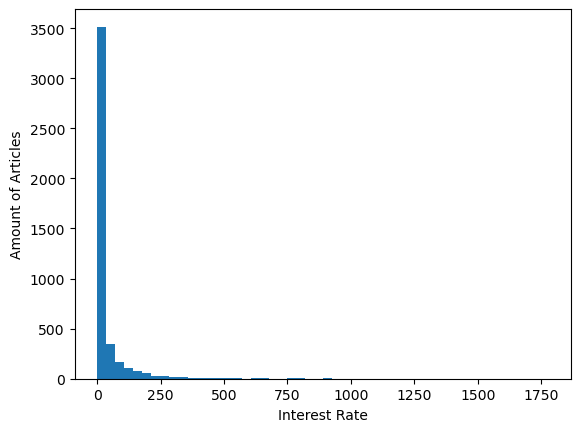

In [170]:
# Use seaborn to create a boxplot of the data

plt.hist(df_final.reviews, bins=50)
plt.xlabel("Interest Rate")
plt.ylabel("Amount of Articles")
# Compute the 25th and 75th percentiles
q25 = df_final["reviews"].quantile(0.25)
q75 = df_final["reviews"].quantile(0.75)

# Calculate the IQR
iqr = q75 - q25

# Identify values that are more than 1.5 times the IQR below the 25th percentile or above the 75th percentile
outliers = df_final[(df_final["reviews"] < q25 - 3*iqr)
               | (df_final["reviews"] > q75 + 3*iqr)]

# Print the indices of the outliers
outliers


In [171]:
features = ['reviews', "Brand", 'gender', 'recommend_to_friend', 'fragrance_family', 'fragrance_classification', 'volume']
X = df_final[features]
y = df_final['Is_Successful']

print(X.head())
print(y.head())

   reviews            Brand gender recommend_to_friend  \
0     1778  Dolce & Gabbana  Women                 94%   
1     1083          Versace  Women                 95%   
2      891          Versace    Men                 96%   
3     1164     Calvin Klein  Women                 96%   
4     1519         Davidoff    Men                 95%   

                  fragrance_family fragrance_classification  \
0                           Citrus    Eau De Toilette (EDT)   
1          Floral, Fruity and Musk    Eau De Toilette (EDT)   
2  Woody, Oriental and Fresh notes    Eau De Toilette (EDT)   
3                           Floral      Eau De Parfum (EDP)   
4                         Aromatic    Eau De Toilette (EDT)   

                                        volume  
0       Available in 24ml, 50ml, 100ml & 200ml  
1      Available in 30ml, 50ml, 90ml and 200ml  
2  Available in 5ml, 30ml, 50ml, 100ml & 200ml  
3              Available in 30ml, 50ml & 100ml  
4       Available in 40ml, 

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("X_train:")
X_train.head()
print("y_train:")
y_train.head()

Initial amount of samples: #4462
Number of training samples: #3569
Number of test samples: #893
X_train:
y_train:


1315    1
2758    0
3605    0
4385    0
2655    0
Name: Is_Successful, dtype: category
Categories (2, int64): [0, 1]

In [173]:
# select numeric features:
X_train_numeric = X_train._get_numeric_data().copy()
X_numeric_cols = X_train_numeric.columns
X_test_numeric = X_test[X_numeric_cols].copy()
X_numeric_cols

Index(['reviews'], dtype='object')

In [174]:
X_test_numeric

,reviews
312,54
1005,30
3881,2
625,5
4213,1
...,...
2133,76
1672,86
2027,7
4142,33


In [175]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test_numeric), columns=X_numeric_cols, index=X_test.index)
X_train_scaled.head()

,reviews
1315,0.006753
2758,0.000000
3605,0.002251
4385,0.000000
2655,0.000563


In [176]:
X_train_numeric.max().sort_values()

reviews    1778
dtype: int32

In [177]:
X.select_dtypes('category')

,Brand,gender,recommend_to_friend,fragrance_family,fragrance_classification,volume
0,Dolce & Gabbana,Women,94%,Citrus,Eau De Toilette (EDT),"Available in 24ml, 50ml, 100ml & 200ml"
1,Versace,Women,95%,"Floral, Fruity and Musk",Eau De Toilette (EDT),"Available in 30ml, 50ml, 90ml and 200ml"
2,Versace,Men,96%,"Woody, Oriental and Fresh notes",Eau De Toilette (EDT),"Available in 5ml, 30ml, 50ml, 100ml & 200ml"
3,Calvin Klein,Women,96%,Floral,Eau De Parfum (EDP),"Available in 30ml, 50ml & 100ml"
4,Davidoff,Men,95%,Aromatic,Eau De Toilette (EDT),"Available in 40ml, 75ml, 125ml & 200ml"
...,...,...,...,...,...,...
4528,Cindy C.,Men,100%,Citrus,Cologne,Available in 100 ml
4529,Waterford,Women,92%,NaN,Perfume,"Available in 30 ml, 50 ml and 100 ml"
4530,Perfumers Workshop,Women,100%,Rose,"Body Lotion, Perfume",Available in 50 ml and 207 ml
4531,Bond No. 9,Women,50%,fresh,Perfume,Available in 50 ml and 100 ml


In [178]:
X_discrete = X.select_dtypes('category').copy()
X_discrete_encoded = pd.get_dummies(X_discrete, prefix_sep="__")
X_train_discrete_encoded = X_discrete_encoded.loc[X_train.index, :]
X_test_discrete_encoded = X_discrete_encoded.loc[X_test.index, :]
X_train_discrete_encoded.head()

,Brand__100 Bon,Brand__4711,Brand__50 Cent,Brand__A Lab on Fire,Brand__A. Ferretti,Brand__AIR VAL INTERNATIONAL,Brand__Aayan Perfume,Brand__Abercrombie & Fitch,Brand__Acca Kappa,Brand__Acqua Di Parma,...,volume__Available in 90 ml,volume__Available in 90 ml and 100 ml,volume__Available in 90 ml and 150 ml,volume__Available in 90 ml and 240 ml,"volume__Available in 90 ml, 120 ml and 150 ml","volume__Available in 90 ml, 120 ml, 150 ml and 177 ml",volume__Available in 92 ml,volume__Available in 94 ml,volume__Available in 98 ml,volume__Available in 98 ml and 100 ml
1315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
X_train_processed = pd.concat((X_train_scaled, X_train_discrete_encoded), axis=1)
X_test_processed = pd.concat((X_test_scaled, X_test_discrete_encoded), axis=1)
X_train_processed.head()


,reviews,Brand__100 Bon,Brand__4711,Brand__50 Cent,Brand__A Lab on Fire,Brand__A. Ferretti,Brand__AIR VAL INTERNATIONAL,Brand__Aayan Perfume,Brand__Abercrombie & Fitch,Brand__Acca Kappa,...,volume__Available in 90 ml,volume__Available in 90 ml and 100 ml,volume__Available in 90 ml and 150 ml,volume__Available in 90 ml and 240 ml,"volume__Available in 90 ml, 120 ml and 150 ml","volume__Available in 90 ml, 120 ml, 150 ml and 177 ml",volume__Available in 92 ml,volume__Available in 94 ml,volume__Available in 98 ml,volume__Available in 98 ml and 100 ml
1315,0.006753,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2758,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3605,0.002251,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2655,0.000563,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
X_train_processed.columns

Index(['reviews', 'Brand__100 Bon', 'Brand__4711', 'Brand__50 Cent',
       'Brand__A Lab on Fire', 'Brand__A. Ferretti',
       'Brand__AIR VAL INTERNATIONAL', 'Brand__Aayan Perfume',
       'Brand__Abercrombie & Fitch', 'Brand__Acca Kappa',
       ...
       'volume__Available in 90 ml', 'volume__Available in 90 ml and 100 ml',
       'volume__Available in 90 ml and 150 ml',
       'volume__Available in 90 ml and 240 ml',
       'volume__Available in 90 ml, 120 ml and 150 ml',
       'volume__Available in 90 ml, 120 ml, 150 ml and 177 ml',
       'volume__Available in 92 ml', 'volume__Available in 94 ml',
       'volume__Available in 98 ml', 'volume__Available in 98 ml and 100 ml'],
      dtype='object', length=3252)

# Classification Models

### Logistic Regression Best f1 Score : 0.88

In [207]:
def describe_model(model, X_test, y_test):

    print("Predicting...")
    print("\tdisplaying information re: the 'classification' model ...\n" )
    y_pred = model.predict(X_test)
    print("Model Accuracy: ", model.score(X_test, y_test))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(conf_mat)

    print("\nClassification Report: \n")
    print(classification_report(y_true=y_test, y_pred=y_pred))



In [208]:

logistic_reg = LogisticRegression(class_weight='balanced')
logistic_reg.fit(X_train_processed, y_train)

describe_model(logistic_reg, X_test_processed, y_test)


Predicting...
	displaying information re: the 'classification' model ...

Model Accuracy:  0.832026875699888
[[169  78]
 [ 72 574]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       247
           1       0.88      0.89      0.88       646

    accuracy                           0.83       893
   macro avg       0.79      0.79      0.79       893
weighted avg       0.83      0.83      0.83       893



## Neural NetWork Best f1 Score : 0.87

In [209]:
neural_network = MLPClassifier(random_state=1, max_iter=370, hidden_layer_sizes=400,activation="relu").fit(X_train_processed, y_train)
describe_model(neural_network, X_test_processed, y_test)

Predicting...
	displaying information re: the 'classification' model ...

Model Accuracy:  0.8029115341545353
[[132 115]
 [ 61 585]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.68      0.53      0.60       247
           1       0.84      0.91      0.87       646

    accuracy                           0.80       893
   macro avg       0.76      0.72      0.73       893
weighted avg       0.79      0.80      0.79       893



## Decision Tree Best f1 Score : 0.89

In [184]:
des_tree = tree.DecisionTreeClassifier()
params = {"max_depth": [2, 3, 4, 5, 6, 7],
          "min_samples_split": [5, 10, 15, 20, 25, 30]}
clfCV = GridSearchCV(des_tree, params, cv=10)
clfCV.fit(X_train_processed, y_train)
print(f"best params are:{clfCV.best_params_}")
print(f"best score are:{clfCV.best_score_}")

best params are:{'max_depth': 7, 'min_samples_split': 15}
best score are:0.8402999402007992


In [185]:
des_tree = tree.DecisionTreeClassifier(max_depth=7, min_samples_split=15)
des_tree.fit(X_train_processed, y_train)
describe_model(des_tree, X_test_processed, y_test)


Predicting...
	displaying information re: the 'classification' model ...

Model Accuracy:  0.832026875699888
[[110 137]
 [ 13 633]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.89      0.45      0.59       247
           1       0.82      0.98      0.89       646

    accuracy                           0.83       893
   macro avg       0.86      0.71      0.74       893
weighted avg       0.84      0.83      0.81       893



# Random Foreset Best f1 Score : 0.84

In [186]:
rand_forest = RandomForestClassifier()
params = {"max_depth": [2, 3, 4, 5, 6, 7],"min_samples_split": [5, 10, 15, 20, 25, 30]}
clfCV = GridSearchCV(rand_forest, params, cv=10)
clfCV.fit(X_train_processed, y_train)
print(f"best params are:{clfCV.best_params_}")
print(f"best score are:{clfCV.best_score_}")

best params are:{'max_depth': 2, 'min_samples_split': 5}
best score are:0.7436258773172191


In [189]:
rand_forest = RandomForestClassifier(max_depth=2, min_samples_split=5)
rand_forest.fit(X_train_processed, y_train)
describe_model(rand_forest, X_test_processed, y_test)


Predicting...
	displaying information re: the 'classification' model ...

Model Accuracy:  0.723404255319149
[[  0 247]
 [  0 646]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       247
           1       0.72      1.00      0.84       646

    accuracy                           0.72       893
   macro avg       0.36      0.50      0.42       893
weighted avg       0.52      0.72      0.61       893



C:\Users\97254\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\97254\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\97254\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN Best f1 Score : 0.89

In [190]:
knn = KNeighborsClassifier()
params = {"n_neighbors": [3, 5, 7, 9, 11, 13,15,17,19,21,23]}
# Create a k-NN classifier with 3 neighbors
clfCV = GridSearchCV(knn, params, cv=10)
clfCV.fit(X_train_processed, y_train)
# Fit the classifier to the training data
print(f"best params are:{clfCV.best_params_}")
print(f"best score are:{clfCV.best_score_}")


C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

best params are:{'n_neighbors': 23}
best score are:0.8335748906304093


C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [191]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_processed, y_train)
describe_model(knn, X_test_processed, y_test)


Predicting...
	displaying information re: the 'classification' model ...



C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model Accuracy:  0.8219484882418813
[[102 145]
 [ 14 632]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.41      0.56       247
           1       0.81      0.98      0.89       646

    accuracy                           0.82       893
   macro avg       0.85      0.70      0.73       893
weighted avg       0.83      0.82      0.80       893



C:\Users\97254\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# In conclusion:

# The Logistic Regression gives us the highest score among the rest  (0.88) 